**Exploratory Data Analysis on Stroke Prediction**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. 

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

Finding null values as per below table

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

# Data Cleaning

There are 201 *bmi* null values, hence using mean value of *bmi* to replace null values *bmi* feature in data set 

In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Descriptive statistics for quantitative features of the dataset can be generated using describe() method as shown below.

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Univatiate Analysis

Univariate analysis is one of the simplest form to analyse data, which explores each feature separately

## Numerical feature

Lets look at each numerical feature distribution separately

### *age* & *bmi* 

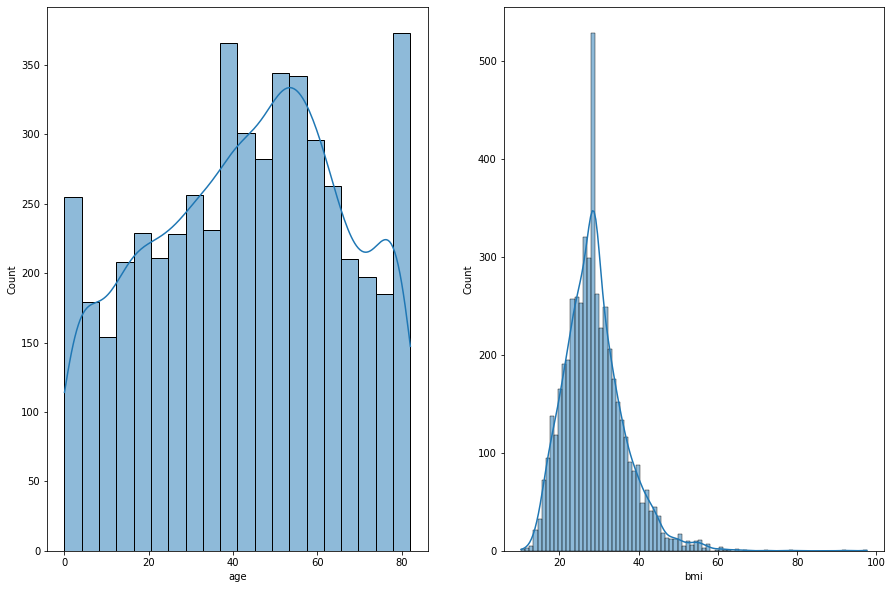

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(data=df,x='age',kde=True)

plt.subplot(1,2,2)
sns.histplot(data=df,x='bmi',kde=True)



*   Average count of *age* is 43 
*   Average *bmi* level is 28 



### Average Glucose Level

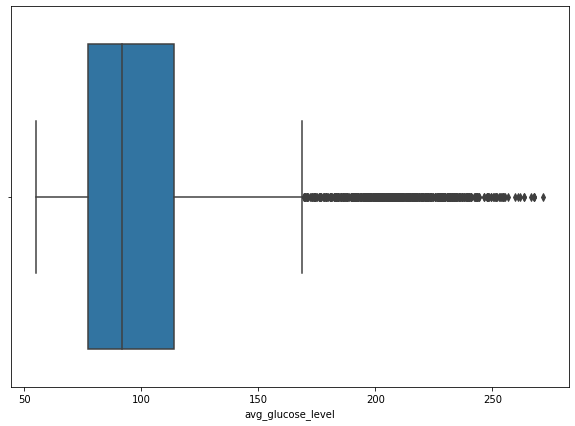

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='avg_glucose_level')

 *avg_glucose_level* as per the above box plot is within 110.

## Categorical Feature

Lets look at each Categorical feature distribution separately

### Hypertension & Heart disease

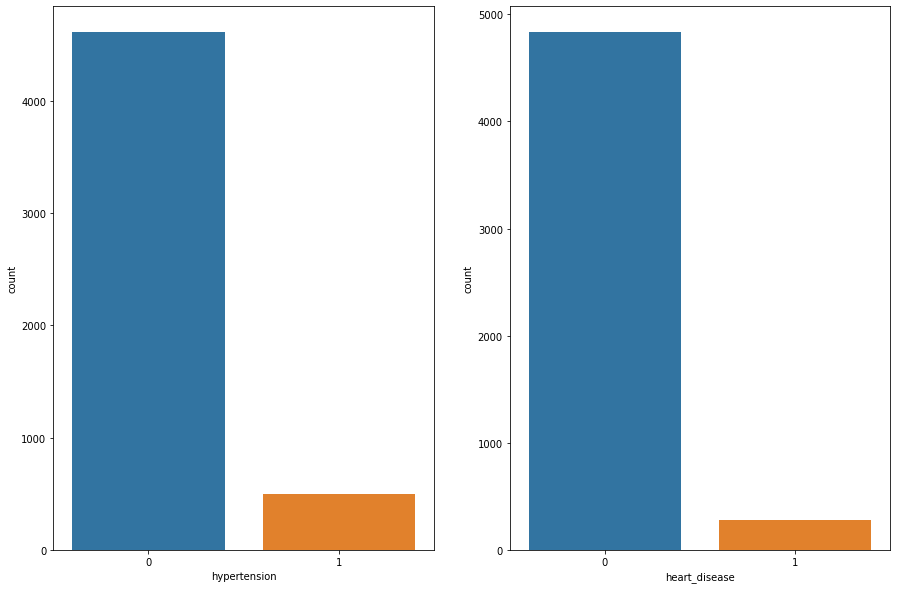

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(x=df['hypertension'])

plt.subplot(1,2,2)
sns.countplot(x=df['heart_disease'])



The above count plot gives an overview on more number of people with no *hypertension* & *heart_disease* as per the sample considered in data set

### Stroke

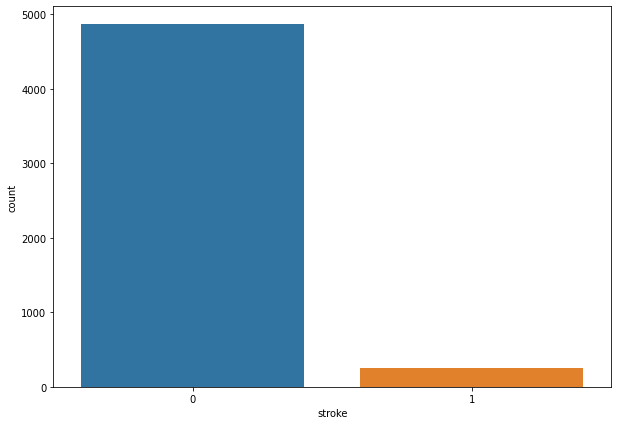

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='stroke')

While looking at people prone to *stroke*, the data count shows lesser number who are prone to it .

### Ever married

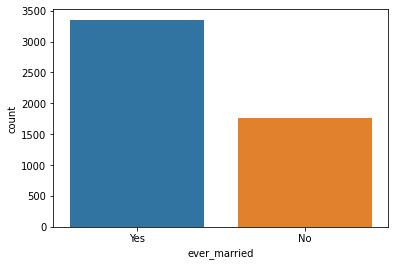

In [ ]:
sns.countplot(data=df,x='ever_married')

Married person is more in number as per above countplot

### Work Type

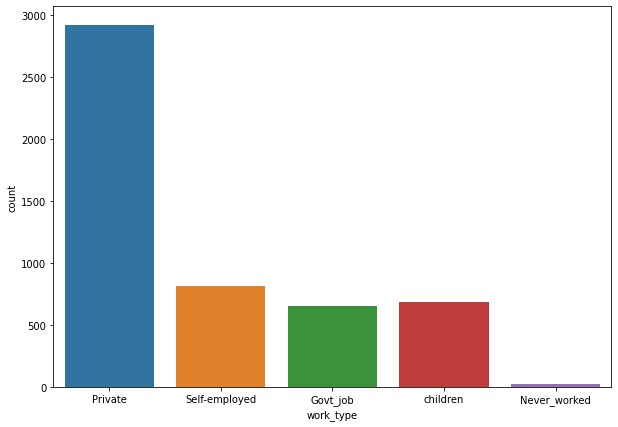

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='work_type')

There is high number of people working in Private sector as per the above data.


### Smoking status

In [ ]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

([<matplotlib.patches.Wedge at 0x7f84ed0cd580>,
 [Text(0.4360557107141461, 1.0098789121244096, 'never smoked'),
  Text(-1.0901353192802539, -0.1469863451404224, 'Unknown'),
  Text(0.06783684892753788, -1.198081033122377, 'formerly smoked'),
  Text(1.0615697403761692, -0.5595263052955353, 'smokes')],
 [Text(0.2378485694804433, 0.5508430429769506, '37.0%'),
  Text(-0.5946192650619565, -0.08017437007659402, '30.2%'),
  Text(0.039571495207730435, -0.69888060265472, '17.3%'),
  Text(0.6192490152194321, -0.32639034475572887, '15.4%')])

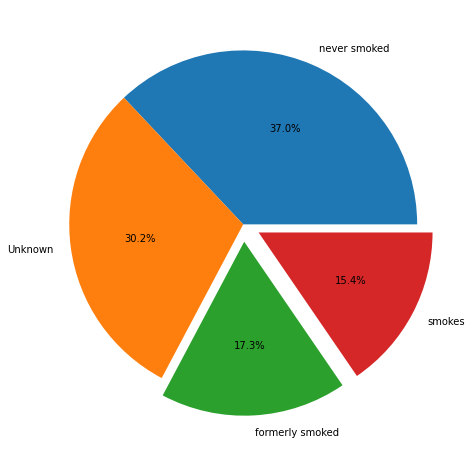

In [ ]:
plt.figure(figsize=(15,8))
explode=[0,0,0.1,0.1]
plt.pie(df.smoking_status.value_counts(),labels=df.smoking_status.value_counts().index.tolist(),autopct= '%1.1f%%',explode=explode)

Looking at the *smoking_status* never smoked(37%) is more in number * slightly skewed with unknown(30%) values.
where in smokes contributes to 15.4% & formerly smoked to 17.3%.

# Bivariate Analysis

Bivariate analysis helps in determining relationship between two features/variables.

## Numerical Feature

### Correlation Matrix

In [ ]:
corr=df.corr()

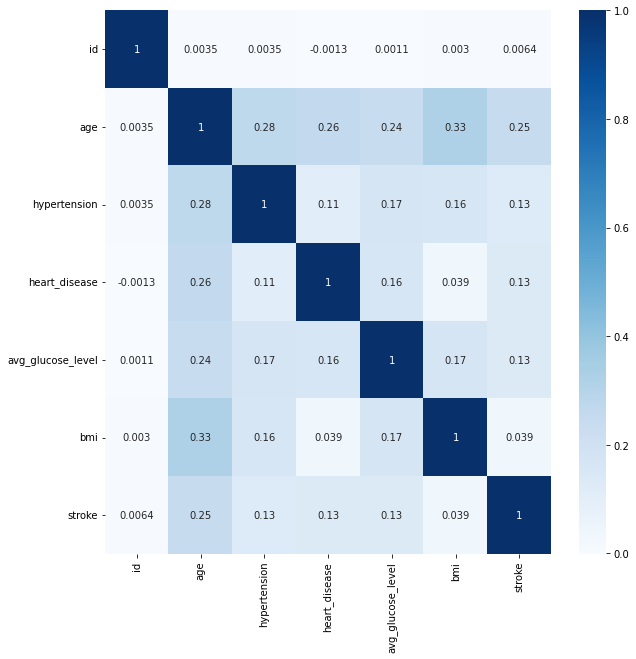

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='Blues', annot = True)

The above correclation heatmap doent show any correlation between the attributes.

### Age and its effect on stroke

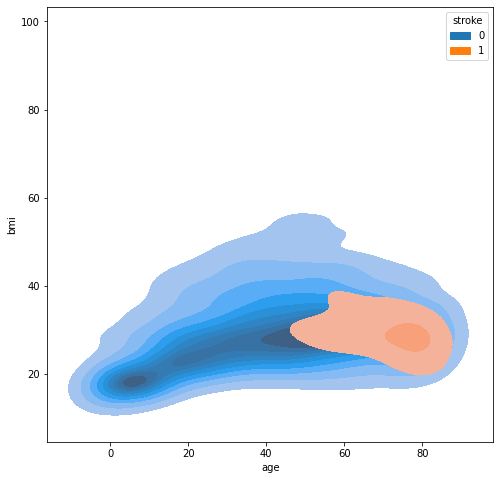

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=df,x='age', y='bmi' ,hue='stroke',fill=True)

Based on the above plot very less number of people in this sample data is likely to be prone to stroke, that is their *age* falls between 50-80yrs, however maximum number says not prone to stroke with average *bmi* being 28. 

### Glucose level & their effect on heart disease/hypertension.

The below plots give us an overview of *avg_glucose_level* effects on heart disease/hypertension.

Both the plots shows a similar context that very less people suffer from hyper tension/Heart disease with avg-glucose_level being 106, and the age of people prone to disease lie between 50-80yrs

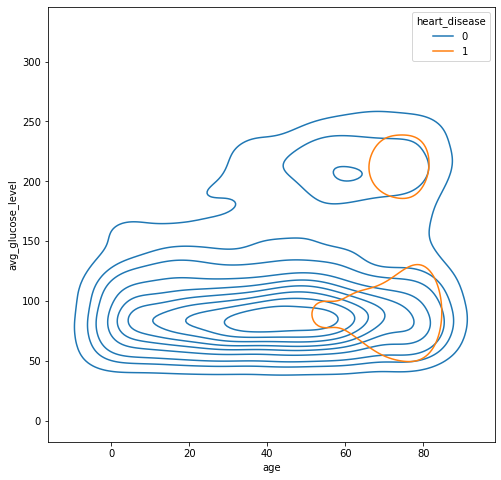

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=df,x='age', y='avg_glucose_level' ,hue='heart_disease')

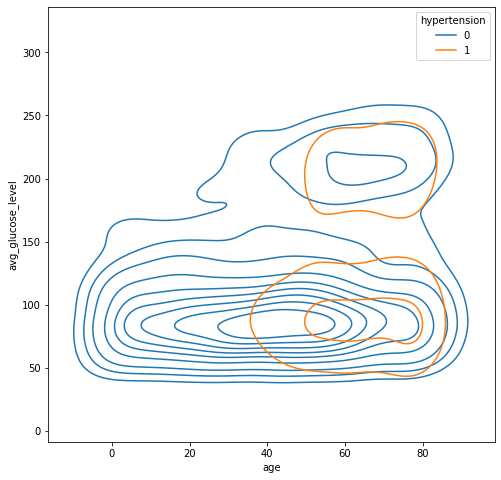

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=df,x='age', y='avg_glucose_level' ,hue='hypertension')

## Categorical Feature

In [ ]:
hyperten=df.groupby(['gender','hypertension'])['work_type'].value_counts().unstack()

In [ ]:
print(hyperten)

work_type            Govt_job  Never_worked  Private  Self-employed  children
gender hypertension                                                          
Female 0                356.0          11.0   1599.0          426.0     326.0
       1                 43.0           NaN    155.0           78.0       NaN
Male   0                228.0          11.0   1044.0          249.0     361.0
       1                 30.0           NaN    126.0           66.0       NaN
Other  0                  NaN           NaN      1.0            NaN       NaN


Work_type

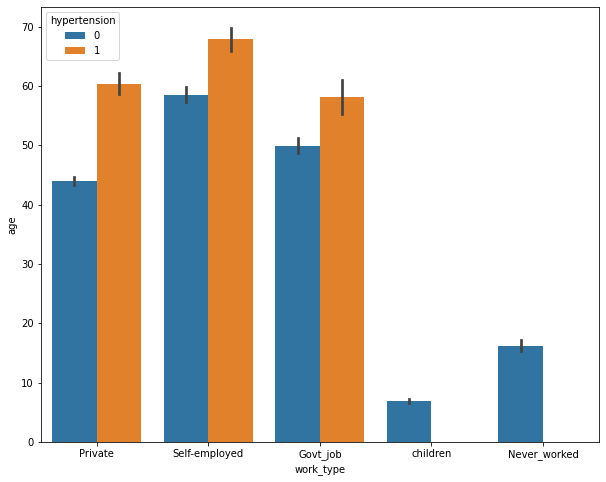

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='work_type',y='age',hue='hypertension')

Considering the *work_type* of data sample, private job employees & self-emplyed people are more in number with hypertension.

### Gender

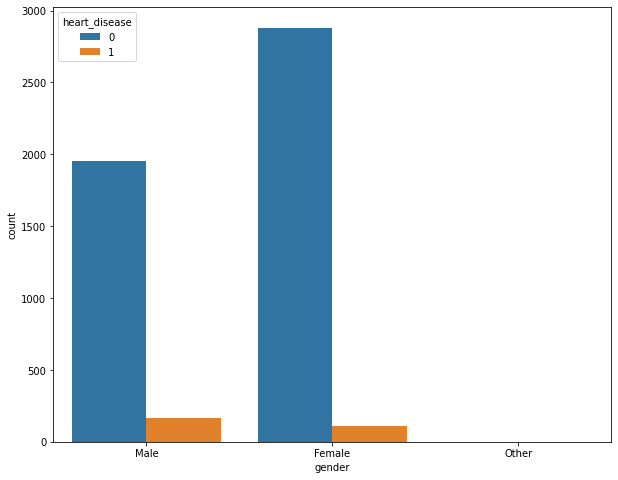

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='gender',hue='heart_disease')

Looking at *gender* who are prone to heart disease, Male is on higher side with more heart disease rate.

### Smoking Status

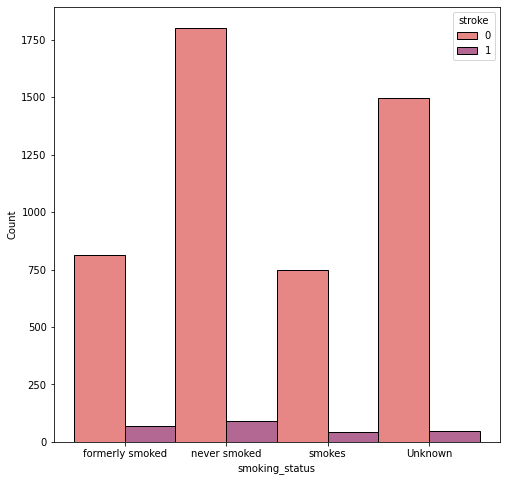

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(df,x='smoking_status',hue='stroke',palette='flare',binwidth=5,multiple='dodge')

*never smoked* people are likely to be prone to stroke with respect to above plot, however ther is more number on *Unknown* as well, hence we cannot conclude whether smoking status has effects on stroke prediction.

### Residence type

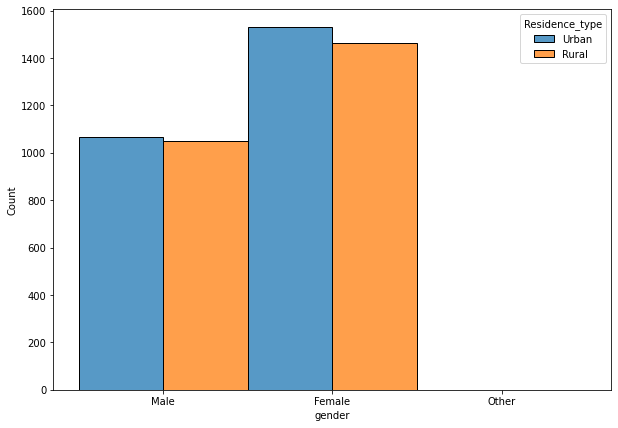

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df,x='gender',hue='Residence_type',multiple='dodge')

Based on the above analysis female count is more in both Urban & rural *Residence_type* ,which indicates that female count is dominant over male count .

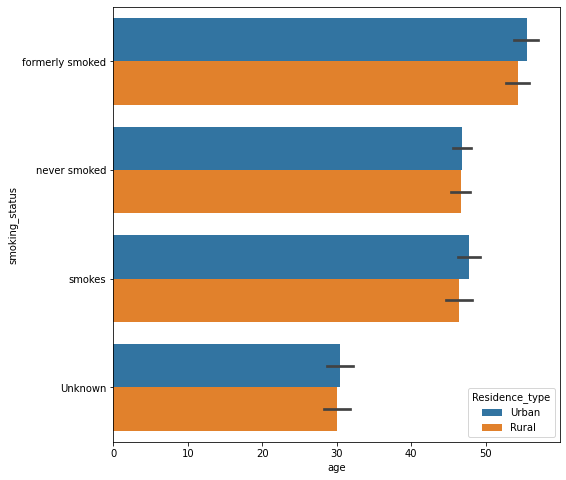

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='age',y='smoking_status',hue='Residence_type')

With the above analysis Urban people are slightly higher in number who *formerly smoked* & in *smokes* & their age fall with in 55years.

<Figure size 720x720 with 0 Axes>

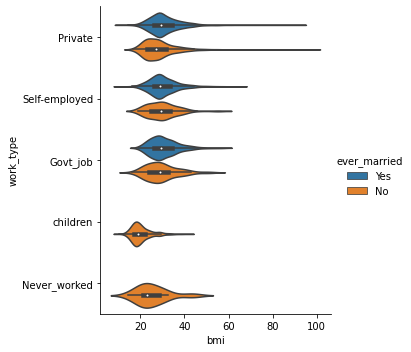

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(data=df,x='bmi',y='work_type',hue='ever_married',kind='violin')

Considering *work_type* & their average *bmi*(28.8), the data distribution shows more in married people who are in private, self-employed & govt jobs.

That means the above data set sample is more concentrated in this category.